Purpose:  
1) Provide information about the strength (amplitude) of each frequency component in the signal  

2) Calculate the power spectrum of the data. The power spectrum shows the distribution of power into the frequency components composing that signal.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Here's the first iteration of the code:
(This version is fully working but wasn't concise)

ValueError: x and y must have same first dimension, but have shapes (8256,) and (8253,)

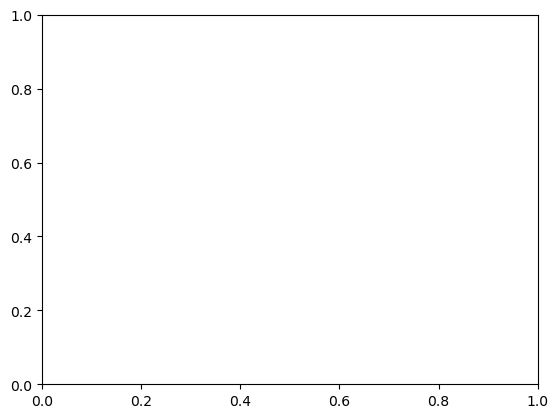

In [13]:
'''
# Import data, slice y-component of magnetization, and take FFT
Y = np.fft.fft((A := np.genfromtxt('30nm_currentchange\\30nm_0.10A.txt', delimiter=None))[round(len(A)/5):, 5])

# Define the frequency for plot and number of points
f3 = np.array(range(round(len(Y)/2))) / 10e7
N = len(Y)

# Construct single-sided amplitude spectrum and calculate power
P1, p = (2 * np.abs(Y[:round(N/2)])/N)[1:-2], np.abs(Y[:round(N/2)])**2

# Plot amplitude and power
for i, y, title, ylabel in zip(range(2), [P1, p], ["Amplitude Spectrum", "Power Spectrum"], ["Amplitude", "Power"]):
    plt.figure(i+1)
    plt.plot(f3, y)
    plt.title(title)
    plt.xlabel("f (Hz)")
    plt.ylabel(ylabel)

plt.show()
'''

Second iteration: (This is a concise version of the previous code)

In [4]:
'''
# Import data, slice y-component of magnetization, and take FFT
Y = np.fft.fft((A := np.genfromtxt('20nm_a0.1_j0.08.txt', delimiter=None))[round(len(A)/5):, 5])

# Define the frequency for plot and number of points
f3 = np.array(range(round(len(Y)/2))) / 10e7
N = len(Y)

# Construct single-sided amplitude spectrum and calculate power
P1, p = (2 * np.abs(Y[:round(N/2)])/N)[1:-2], np.abs(Y[:round(N/2)])**2

# Plot amplitude and power
for i, y, title, ylabel in zip(range(2), [P1, p], ["Amplitude Spectrum", "Power Spectrum"], ["Amplitude", "Power"]):
    plt.figure(i+1)
    plt.plot(f3, y)
    plt.title(title)
    plt.xlabel("f (Hz)")
    plt.ylabel(ylabel)

plt.show()
'''

'\n# Import data, slice y-component of magnetization, and take FFT\nY = np.fft.fft((A := np.genfromtxt(\'20nm_a0.1_j0.08.txt\', delimiter=None))[round(len(A)/5):, 5])\n\n# Define the frequency for plot and number of points\nf3 = np.array(range(round(len(Y)/2))) / 10e7\nN = len(Y)\n\n# Construct single-sided amplitude spectrum and calculate power\nP1, p = (2 * np.abs(Y[:round(N/2)])/N)[1:-2], np.abs(Y[:round(N/2)])**2\n\n# Plot amplitude and power\nfor i, y, title, ylabel in zip(range(2), [P1, p], ["Amplitude Spectrum", "Power Spectrum"], ["Amplitude", "Power"]):\n    plt.figure(i+1)\n    plt.plot(f3, y)\n    plt.title(title)\n    plt.xlabel("f (Hz)")\n    plt.ylabel(ylabel)\n\nplt.show()\n'

Third iteration:  
This one is more readable. USE THIS ONE ONLY!!  
The main difference between the previous script and this script is the addition of functionality to isolate and print the three dominant frequencies from the FFT results and their corresponding power.

Frequency: 0.013808139534883721, Power: 0.24881250974345545
Frequency: 0.013747577519379845, Power: 0.03755618671958772
Frequency: 0.027616279069767442, Power: 0.025441882627456506


ValueError: x and y must have same first dimension, but have shapes (8256,) and (8255,)

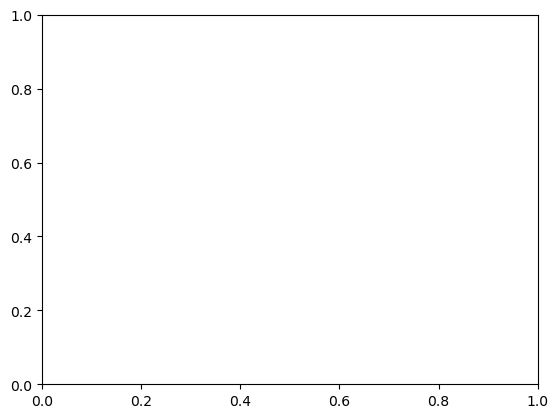

In [12]:
'''
# If the table is in xlsx format
# Import data from .xlsx file
data = pd.read_excel('30nm_currentchange/30nm_0\.10A.xlsx').to_numpy()
Y = np.fft.fft(data[round(len(data) / 5):, 5])
'''


# Import data, slice y-component of magnetization, and take FFT
data = np.genfromtxt('30nm_currentchange\\30nm_0.10A.txt', delimiter=None)
y = data[round(len(data)/5):, 5]
Y = np.fft.fft(y)


# Define the frequency for plot and number of points
N = len(Y)
frequencies = np.fft.fftfreq(N)[:round(N/2)]
#frequencies = np.fft.fftfreq(N)

# Construct single-sided amplitude spectrum and calculate power
P2 = np.abs(Y/N)
P1 = P2[1:round(N/2)]
P1[1:-2] = 2*P1[1:-2]

# Calculate power
p = P1**2

# Find the first three frequencies and corresponding powers
sorted_indices = np.argsort(p)[::-1]
first_three_freqs = frequencies[sorted_indices][:3]
first_three_powers = p[sorted_indices][:3]

# Print the first three frequencies and corresponding powers
for freq, power in zip(first_three_freqs, first_three_powers):
    print(f"Frequency: {freq}, Power: {power}")

# Plot amplitude and power
for i, y, title, ylabel in zip(range(2), [P1, p], ["Amplitude Spectrum", "Power Spectrum"], ["Amplitude", "Power"]):
    plt.figure(i+1)
    #plt.plot(frequencies[:round(N/2)], y)
    plt.plot(frequencies, y)
    plt.title(title)
    plt.xlabel("f (Hz)")
    plt.ylabel(ylabel)

plt.show()

In [10]:
data = np.genfromtxt('30nm_currentchange\\30nm_0.10A.txt', delimiter=None)

First three frequencies and corresponding powers:
Frequency: 10000000.0 Hz
Power: 0.0061150990839771
Amplitude: 0.001217115812947246

Frequency: 20000000.0 Hz
Power: 0.006208712190129341
Amplitude: 0.0012263965491107953

Frequency: 30000000.0 Hz
Power: 0.006265384835681694
Amplitude: 0.0012319810608224532



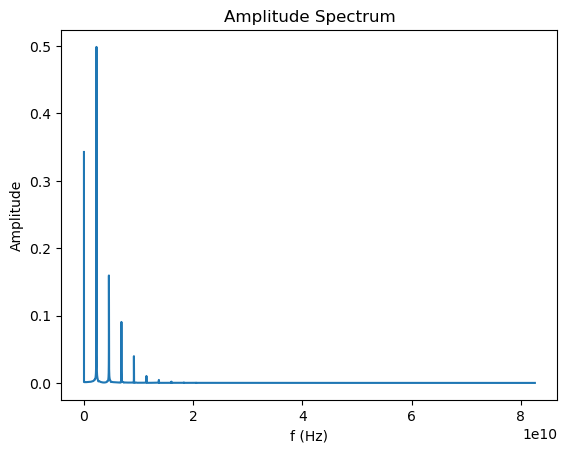

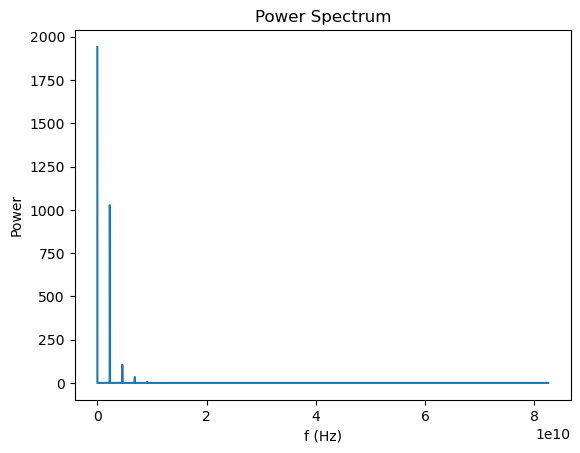

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Import data
filename = '30nm_currentchange\\30nm_0.10A.txt'
data = np.loadtxt(filename, skiprows=1)  # Assuming the first row contains column headers

# Extract m.region1y column
my = data[:, 5]

# Cut out first 20 percent of points
L = len(my)
L2 = int(L / 5)
my = my[L2:]

# Perform FFT and calculate amplitude spectrum
N = len(my)
Fs = N / (100 * 10**(-9))
Y = np.fft.fft(my)
P2 = np.abs(Y / N)
P1 = P2[:int(N/2) + 1]
P1[1:-1] = 2 * P1[1:-1]
frequencies = np.arange(len(P1)) * Fs / N

# Calculate power spectrum
p = np.abs(Y[:int(N/2) + 1])**2 / N

# Plot amplitude spectrum
plt.figure(1)
plt.plot(frequencies, P1)
plt.title("Amplitude Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("Amplitude")

# Plot power spectrum
plt.figure(2)
plt.plot(frequencies, p)
plt.title("Power Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("Power")

# Print the first three frequencies, powers, and amplitudes
print("First three frequencies and corresponding powers:")
for i in range(1,4):
    print("Frequency:", frequencies[i], "Hz")
    print("Power:", p[i])
    print("Amplitude:", P1[i])
    print()

plt.show()


Frequency: 2280000000.0 Hz
Power: 155.03193877845808
Amplitude: 0.19379418649584854

Frequency: 2290000000.0 Hz
Power: 1027.0980402209836
Amplitude: 0.49881109625133185

Frequency: 0.0 Hz
Power: 1940.970878192311
Amplitude: 0.34285435452631263



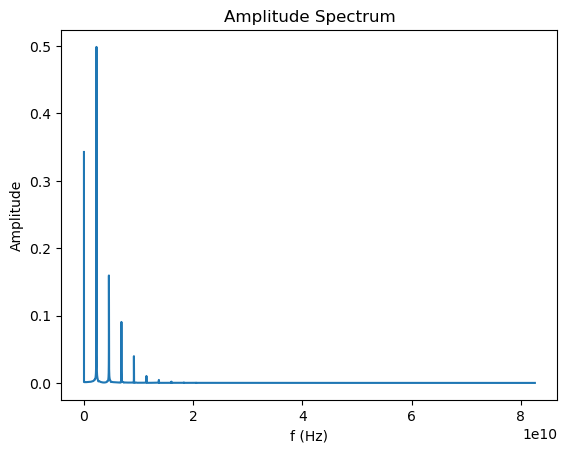

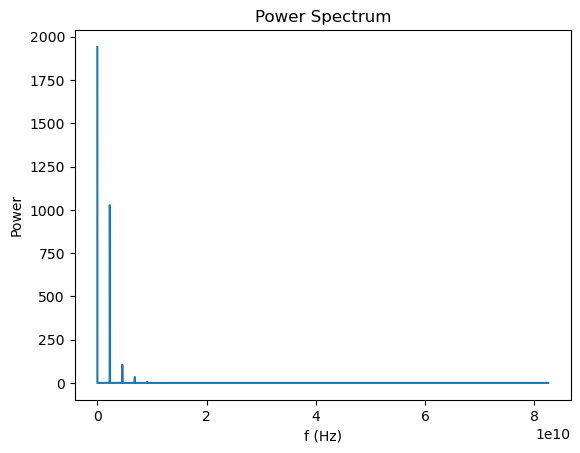

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Import data
filename = '30nm_currentchange\\30nm_0.10A.txt'
data = np.loadtxt(filename, skiprows=1)  # Assuming the first row contains column headers

# Extract m.region1y column
my = data[:, 5]

# Cut out first 20 percent of points
L = len(my)
L2 = int(L / 5)
my = my[L2:]

# Perform FFT and calculate amplitude spectrum
N = len(my)
Fs = N / (100 * 10**(-9))
Y = np.fft.fft(my)
P2 = np.abs(Y / N)
P1 = P2[:int(N/2) + 1]
P1[1:-1] = 2 * P1[1:-1]
frequencies = np.arange(len(P1)) * Fs / N

# Calculate power spectrum
p = np.abs(Y[:int(N/2) + 1])**2 / N

# Find the indices of the first three spikes
spike_indices = np.argsort(p)[-3:]

# Get the frequencies, powers, and amplitudes of the first three spikes
spike_frequencies = frequencies[spike_indices]
spike_powers = p[spike_indices]
spike_amplitudes = P1[spike_indices]

# Print the frequencies, powers, and amplitudes of the first three spikes
for freq, power, amplitude in zip(spike_frequencies, spike_powers, spike_amplitudes):
    print("Frequency:", freq, "Hz")
    print("Power:", power)
    print("Amplitude:", amplitude)
    print()

# Plot amplitude spectrum
plt.figure(1)
plt.plot(frequencies, P1)
plt.title("Amplitude Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("Amplitude")

# Plot power spectrum
plt.figure(2)
plt.plot(frequencies, p)
plt.title("Power Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("Power")

plt.show()

Frequency: 2290000000.0 Hz
Power: 1027.0980402209836
Amplitude: 0.49881109625133185

Frequency: 0.0 Hz
Power: 1940.970878192311
Amplitude: 0.34285435452631263



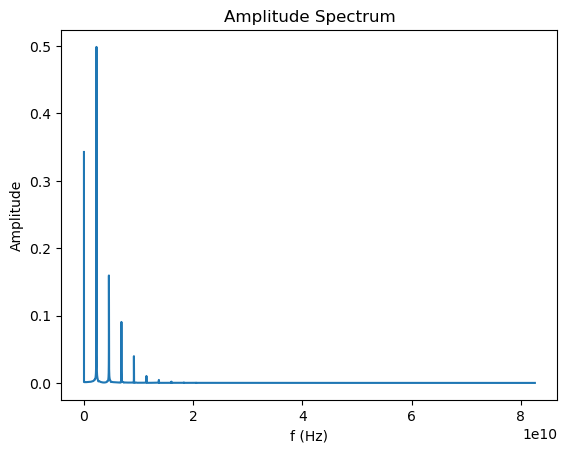

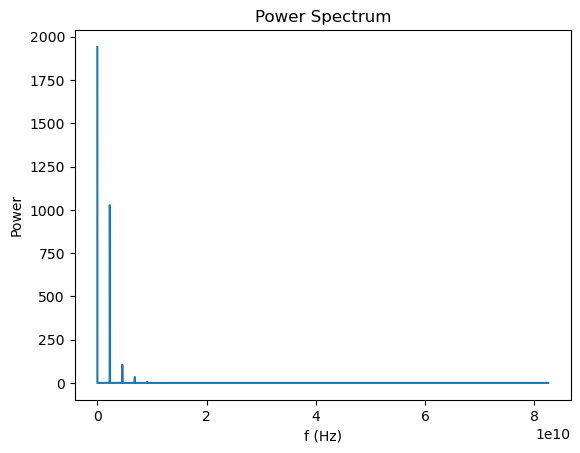

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Import data
filename = '30nm_currentchange\\30nm_0.10A.txt'
data = np.loadtxt(filename, skiprows=1)  # Assuming the first row contains column headers

# Extract m.region1y column
my = data[:, 5]

# Cut out first 20 percent of points
L = len(my)
L2 = int(L / 5)
my = my[L2:]

# Perform FFT and calculate amplitude spectrum
N = len(my)
Fs = N / (100 * 10**(-9))
Y = np.fft.fft(my)
P2 = np.abs(Y / N)
P1 = P2[:int(N/2) + 1]
P1[1:-1] = 2 * P1[1:-1]
frequencies = np.arange(len(P1)) * Fs / N

# Calculate power spectrum
p = np.abs(Y[:int(N/2) + 1])**2 / N

# Find the indices of the three highest spikes
num_spikes = 3
spike_indices = np.argsort(p)[-num_spikes:]

# Find the threshold as a fraction of the maximum power
threshold_fraction = 0.1
threshold = threshold_fraction * np.max(p)

# Get the frequencies, powers, and amplitudes of the spikes above the threshold
selected_spikes = []
for i in spike_indices:
    if p[i] > threshold:
        selected_spikes.append(i)

spike_frequencies = frequencies[selected_spikes]
spike_powers = p[selected_spikes]
spike_amplitudes = P1[selected_spikes]

# Print the frequencies, powers, and amplitudes of the selected spikes
for freq, power, amplitude in zip(spike_frequencies, spike_powers, spike_amplitudes):
    print("Frequency:", freq, "Hz")
    print("Power:", power)
    print("Amplitude:", amplitude)
    print()

# Plot amplitude spectrum
plt.figure(1)
plt.plot(frequencies, P1)
plt.title("Amplitude Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("Amplitude")

# Plot power spectrum
plt.figure(2)
plt.plot(frequencies, p)
plt.title("Power Spectrum")
plt.xlabel("f (Hz)")
plt.ylabel("Power")

plt.show()
